# Practical 5D
This practical is related to Example 2.
<br>Obtain the PCA output table, screen plot and loading plot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

Read in the correlation matrix

In [2]:
correlation = pd.read_csv("Chp5Eg2.csv", names=['0.5s', '1s', '3s', '6s', '15s']) 
correlation.index = ['0.5s', '1s', '3s', '6s', '15s']
correlation

,0.5s,1s,3s,6s,15s
0.5s,1.00,0.71,0.58,0.56,0.65
1s,0.71,1.00,0.71,0.60,0.69
3s,0.58,0.71,1.00,0.75,0.71
6s,0.56,0.60,0.75,1.00,0.74
15s,0.65,0.69,0.71,0.74,1.00


Obtain the eigenvalues and eigenvectors and put them into dataframes.

In [3]:
w, V = np.linalg.eig(correlation)
w
#always check if eigenvalues are in descending order

array([3.68308861, 0.53125005, 0.33001244, 0.25877216, 0.19687674])

In [4]:
#Put the eigenvalues into a dataframe
w_df = pd.DataFrame(np.round(w,4), columns=['Eigenvalues'])
w_df.index = ['PC{}'.format(i) for i in range(1,len(w_df)+1)]
w_df

,Eigenvalues
PC1,3.6831
PC2,0.5313
PC3,0.3300
PC4,0.2588
PC5,0.1969


In [5]:
V

array([[ 0.42239572,  0.66606983,  0.40295603, -0.4245783 ,  0.18786308],
       [ 0.45056706,  0.37835111, -0.56571562,  0.28169892, -0.50443167],
       [ 0.45672582, -0.32552216, -0.51511831, -0.28833683,  0.58047553],
       [ 0.44386102, -0.53594802,  0.31004287, -0.3469872 , -0.54701043],
       [ 0.46147599, -0.14140884,  0.39511874,  0.73269417,  0.27218356]])

In [6]:
V_df = pd.DataFrame(np.round(V,4))
V_df.index = ['0.5s', '1s', '3s', '6s', '15s']
V_df = V_df.T
V_df

,0.5s,1s,3s,6s,15s
0,0.4224,0.4506,0.4567,0.4439,0.4615
1,0.6661,0.3784,-0.3255,-0.5359,-0.1414
2,0.4030,-0.5657,-0.5151,0.3100,0.3951
3,-0.4246,0.2817,-0.2883,-0.3470,0.7327
4,0.1879,-0.5044,0.5805,-0.5470,0.2722


## Task 1
Using the eigenvalues and eigenvectors dataframes, write a function that can produce the PCA output table.

In [7]:
# Computes the % variance explained and cumulative % variance explained.
# Pass the eigenvalues and eigenvectors dataframes to this function.
# This function returns a table summarising the eigenvalues, % variance explained, cumulative % variance explained and PCs

def pca_results_matrix(eValues, eVectors):
    eigvals = eValues
    eigvecs = eVectors
    # Dimension indexing
    dimensions = ['PC{}'.format(i) for i in range(1,len(eValues)+1)]
    # Compute the % explained variance for each PC
    exp_var = []
    for i in range(len(eValues)):
        exp_var.append(np.round(eValues['Eigenvalues'].iloc[i]/eValues['Eigenvalues'].sum(),4))
    exp_variance = pd.DataFrame(exp_var,columns=['Explained Variance'])
    exp_variance.index= dimensions   

    # Compute the cumulative % variance explained
    cum_variance = pd.DataFrame()
    cum_variance['Cumulative Explained Variance'] =  exp_variance.cumsum(axis=0)
    cum_variance.index = dimensions
    # Return a concatenated DataFrame
    return pd.concat([eigvals,exp_variance,cum_variance,eigvecs],axis=1)

In [8]:
results = pca_results_matrix(w_df, V_df)
results

,Eigenvalues,Explained Variance,Cumulative Explained Variance,0.5s,1s,3s,6s,15s
PC1,3.6831,0.7366,0.7366,NaN,NaN,NaN,NaN,NaN
PC2,0.5313,0.1063,0.8429,NaN,NaN,NaN,NaN,NaN
PC3,0.3300,0.0660,0.9089,NaN,NaN,NaN,NaN,NaN
PC4,0.2588,0.0518,0.9607,NaN,NaN,NaN,NaN,NaN
PC5,0.1969,0.0394,1.0001,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,0.4224,0.4506,0.4567,0.4439,0.4615
1,NaN,NaN,NaN,0.6661,0.3784,-0.3255,-0.5359,-0.1414
2,NaN,NaN,NaN,0.4030,-0.5657,-0.5151,0.3100,0.3951
3,NaN,NaN,NaN,-0.4246,0.2817,-0.2883,-0.3470,0.7327
4,NaN,NaN,NaN,0.1879,-0.5044,0.5805,-0.5470,0.2722


## Task 2
Write the code to obtain the scree plot using the eigenvalues dataframe.

<Figure size 432x288 with 0 Axes>

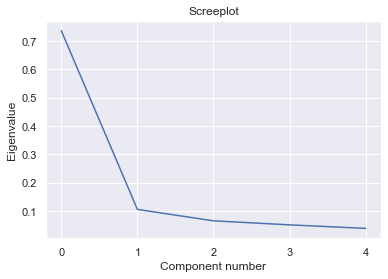

In [9]:
#Scree plot
import matplotlib.ticker as ticker
plt.clf()
fig1, ax1 = plt.subplots()
ax1.plot([0.7366,0.1063,0.0660,0.0518,0.0394])
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set(xlabel = 'Component number', ylabel = 'Eigenvalue', title = 'Screeplot')
plt.show()

## Task 3
Using the eigenvectors dataframe, write a function that can produce the loading plot.

In [10]:
# This function plots the loading plot from the eigenvectors/PCs dataframe.
# Pass the eigenvectors/PCs dataframe to this function. Optional width, height and margin.
# This function returns the axes of the loading plot

def loadingplot_eVectors(eVectors, width=5, height=5, margin=0.5):

    fig, ax = plt.subplots(figsize = (width, height))

    # #Set limits for figure
    # x_min = min(eVectors[0,:].min(),0)-margin
    # x_max = max(eVectors[0,:].max(),0)+margin
    # y_min = min(eVectors[1,:].min(),0)-margin
    # y_max = max(eVectors[1,:].max(),0)+margin

    # ax.set_xlim(x_min, x_max)
    # ax.set_ylim(y_min, y_max)

    #Scaling factor for text position
    text_pos = 0.2
    
    # Draw arrows and label them
    for i, v in enumerate(eVectors.T):
        ax.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.05, linewidth=2, color='red')
        ax.text(v[0], v[1]+text_pos, eVectors.T.columns[i], color='black', ha='center', va='center', fontsize=12)

        
    plt.plot(color='k', linestyle='--', linewidth=1)
    plt.plot(color='k', linestyle='--', linewidth=1)
    ax.set_xlabel("PC1", fontsize=14)
    ax.set_ylabel("PC2", fontsize=14)
    ax.set_title("Loading plot", fontsize = 14)

    return ax

In [11]:
V_df

,0.5s,1s,3s,6s,15s
0,0.4224,0.4506,0.4567,0.4439,0.4615
1,0.6661,0.3784,-0.3255,-0.5359,-0.1414
2,0.4030,-0.5657,-0.5151,0.3100,0.3951
3,-0.4246,0.2817,-0.2883,-0.3470,0.7327
4,0.1879,-0.5044,0.5805,-0.5470,0.2722


TypeError: 'int' object is not subscriptable

<Figure size 432x288 with 0 Axes>

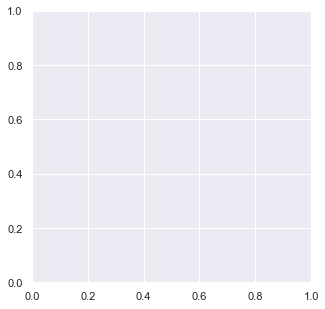

In [12]:
plt.clf()
ax2 = loadingplot_eVectors(V_df, width = 5, height = 5, margin = 0.2)
plt.show()